In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)

In [2]:
oof_df = pd.read_csv("../data/evaluation/toxic-dbmdz-bert-base-turkish-128k-uncased_OOF.csv")

In [3]:
# Yarışma verisinin sızmaması adına devre-dışı

# errors = oof_df[oof_df.target != oof_df.pred][["text", "target", "pred"]].sort_values(by="target")
# errors.to_csv("errors.csv", index=False)

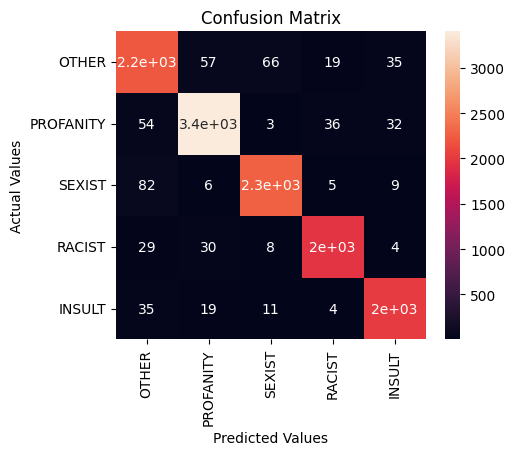

In [4]:
labels = ['OTHER', 'PROFANITY', 'SEXIST', 'RACIST', 'INSULT']

cm = confusion_matrix(oof_df["target"],
                      oof_df["pred"]
                     )

cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [5]:
print(classification_report(oof_df["target"],
                            oof_df["pred"],
                            output_dict=False,
                            digits=4))

              precision    recall  f1-score   support

      INSULT     0.9172    0.9260    0.9216      2393
       OTHER     0.9681    0.9646    0.9663      3528
   PROFANITY     0.9627    0.9571    0.9599      2376
      RACIST     0.9684    0.9651    0.9667      2033
      SEXIST     0.9618    0.9668    0.9643      2081

    accuracy                         0.9562     12411
   macro avg     0.9557    0.9559    0.9558     12411
weighted avg     0.9563    0.9562    0.9562     12411

